# MTH 651: Advanced Numerical Analysis

## Lecture 8

### Topics

* Construction of Finite Element Spaces

#### Textbook references

Sections 3.1, 3.2, 3.3

## Piecewise Polynomial Spaces 

As we discussed before, the main idea of the finite element method is to define subspaces of the appropriate Sobolev spaces (e.g. $H^1$) using **piecewise polynomials** defined on a **mesh**.

To illustrate this concept, let's consider a simple approximation problem.

Let $f \in H^1$ be a given function.
Let $V_h \subseteq H^1$ be a finite dimensional subspace.

We could look for $f_h \in V_h$ that **approximates** $f$ (e.g. minimizes some error norm).

We saw before that finite element methods can be used to give us the **best approximation** to a function (e.g. in the energy norm).

So really we are interesting in finding spaces that have good **approximation properties**

### 1D example

For example, in 1D, we could subdivide any interval $[a,b]$ into subintervals defined by points $x_0, x_1, x_2, \ldots, x_n$.

We can consider the space of piecewise polynomials defined on this mesh.
Specifically, let's define a space $W_h$
$$
    W_h = \{ w_h : [a,b] \to \mathbb{R} : w_h |_{[x_i, x_{i+1}]} \text{ is a polynomial of degree at most $k$} \}
$$

If we want to start doing computations using this space, we will need a basis.

An important way that we construct finite element spaces (and their bases) is by **gluing** together "local" spaces and bases.

For example, consider just a single interval, and the space $\mathcal{P}_k$ of degree-$k$ polynomials.
There are many bases we could construct for this space...

* Monomials $\{ 1, x, x^2, x^3, \ldots, x^k \}$ (this is usually a **bad** choice)
* Nodal basis (Lagrange interpolating polynomials at $k+1$ distinct points)
* Orthogonal polynomials
* And many others...

Such a basis immediately gives us a basis for the "piecewise polynomial" space:

Given a basis $\{ \phi_i \}$ for $\mathcal{P}_k$.
Then, define
$$
    \psi_{i,j}(x) = \begin{cases}
        \phi_i(x) & \quad x \in [x_{j-1}, x_j] \\
        0 & \quad \text{otherwise}
    \end{cases}
$$

For example, consider the basis for $\mathcal{P}_2([-1,1])$ given by
$$
    \begin{aligned}
        \phi_1(x) &= (x^2 - x)/2 \\
        \phi_2(x) &= 1 - x^2 \\
        \phi_3(x) &= (x^2 + x)/2
    \end{aligned}
$$

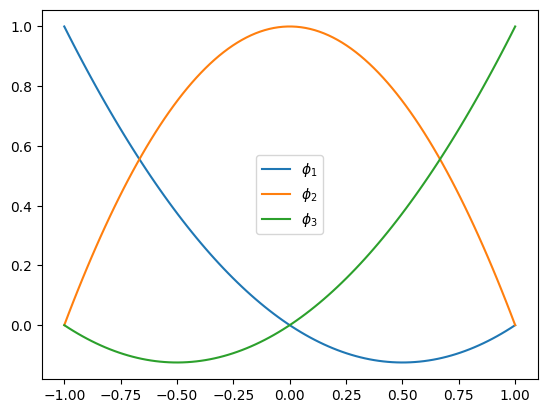

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 1, 100)
plt.plot(x, (x**2 - x)/2, label="$\\phi_1$")
plt.plot(x, 1 - x**2, label="$\\phi_2$")
plt.plot(x, (x**2 + x)/2, label="$\\phi_3$")
plt.legend()

These can be "combined" to get basis functions on each element.

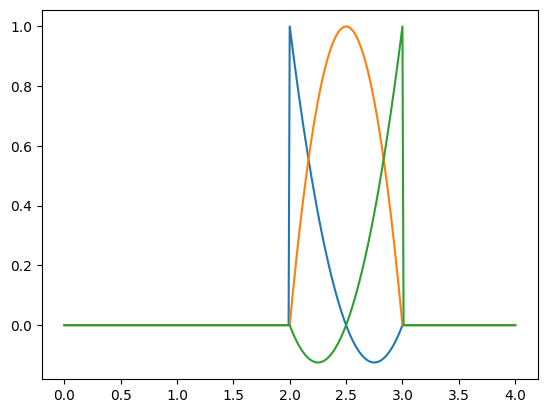

In [2]:
x = np.linspace(0, 4, 401)

phi1 = lambda x: (x**2 - x)/2
phi2 = lambda x: 1 - x**2
phi3 = lambda x: (x**2 + x)/2

def translate(phi, x, a, b):
    if x < a or x > b:
        return 0.0
    else:
        xt = 2*(x - (a + b)/2)/(b-a)
        return phi(xt)

plt.plot(x, np.array(list(map(lambda xi: translate(phi1, xi, 2, 3), x))))
plt.plot(x, np.array(list(map(lambda xi: translate(phi2, xi, 2, 3), x))))
plt.plot(x, np.array(list(map(lambda xi: translate(phi3, xi, 2, 3), x))))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


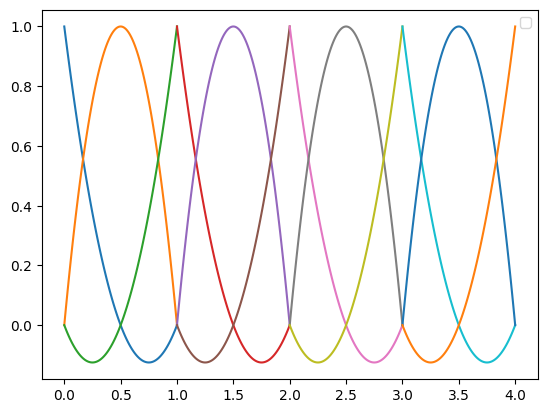

In [3]:
x = np.linspace(-1, 1, 100)
phi1 = (x**2 - x)/2
phi2 = 1 - x**2
phi3 = (x**2 + x)/2

for i in range(4):
    xi = np.linspace(i, i+1, 100)
    plt.plot(xi, phi1)
    plt.plot(xi, phi2)
    plt.plot(xi, phi3)

plt.legend()

### Vandermonde matrices

Suppose $\{ \psi_i \}_{i=1}^n$ is a basis for $\mathcal{P}$.

Furthermore, suppose $\{ N_i \}_{i=1}^n$ is a subset of $\mathcal{P}'$ (i.e. a collection of dual vectors).

Define the **Vandermonde matrix** $V$ by

$$
    V = \big( N_i(\psi_j) \big)_{i,j=1}^n
$$

The Vandermonde matrix gives another proof of the dual basis criterion we saw early.

$\{N_i\}$ is a basis for $\mathcal{P}'$ iff the rows of $V$ are linearly independent.

Since the matrix is square, the rows are linearly independent iff the columns are linearly independent.

The columns being linearly independent is equivalent to

$$
    \sum_j c_j N_i(\psi_j) = 0 \quad \implies \quad c_j = 0 \quad \text{for all $j$}
$$

Given $v \in \mathcal{P}$, $v = \sum_{j} c_j \psi_j$, and so
$$
    \begin{aligned}
        N_i(v)
            &= N_i \left( \sum_j c_j \psi_j \right) \\
            &= \sum_j c_j N_i \left( \psi_j \right) \\
            &= 0 \quad \text{for all $i$ iff the above implication holds.}
    \end{aligned}
$$

This gives the "unisolvence" criterion for $\{ N_i \}$ being a basis of the dual space.

If it is a basis, then as we saw before, we can defined the "dual basis" $\phi_i$ satisfying
$$
    N_i(\phi_j) = \delta_{ij}
$$

So, given some other (arbitrary, e.g. monomial) basis, we can **solve** for the dual basis as follows.

We can expand $\phi_1$ in terms of $\{ \psi_i \}$ as
$$
    \phi_1 = \sum_i \mu_{i,1} \psi_i
$$
for some coefficients $\mu_{i,1}$. Let $\mu_1$ denote this vector of coefficients.

Then, by the dual property,
$$
    V \mu_1 = \begin{pmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{pmatrix}
$$

Repeat this process similarly for the other dual basis vectors $\phi_j$ to obtain a **matrix** of coefficients $\mu$ that satisfy
$$
    V \mu = I,
$$
so the expansion coefficients of the dual basis are given by the **inverse of the Vandermonde matrix**.

For example, consider the linear triangle with vertices $(0,0)$, $(1,0)$, $(0,1)$.

Consider the basis for $\mathcal{P}_1$ defined by $\{ 1, x, y \}$.

Let $\{N_i\}$ be the linear functionals associated with evaluation at the vertices.

Then, we can construct the Vandermonde matrix

In [4]:
import numpy as np

V = np.array([
    [1, 0, 0],
    [1, 1, 0],
    [1, 0, 1]
])

In [5]:
# Its inverse is given by

np.linalg.inv(V)

array([[ 1.,  0.,  0.],
       [-1.,  1.,  0.],
       [-1.,  0.,  1.]])

This gives us the expansion for the **nodal basis functions** in the monomial basis, i.e.

$$
    \begin{aligned}
        \phi_1(x, y) &= 1 - x - y \\
        \phi_2(x, y) &= x \\
        \phi_3(x, y) &= y \\
    \end{aligned}
$$

Let's consider the example of the quadratic triangle.

The monomial basis is $\{ 1, x, y, xy, x^2, y^2 \}$.

The nodal points are $(0,0), (1/2, 0), (1,0), (0, 1/2), (0,1), (1/2, 1/2)$.

In [6]:
psi_1 = lambda x, y: 1
psi_2 = lambda x, y: x
psi_3 = lambda x, y: y
psi_4 = lambda x, y: x*y
psi_5 = lambda x, y: x**2
psi_6 = lambda x, y: y**2
psi = [psi_1, psi_2, psi_3, psi_4, psi_5, psi_6]

x_1 = np.array([0, 0])
x_2 = np.array([0.5, 0])
x_3 = np.array([1, 0])
x_4 = np.array([0, 0.5])
x_5 = np.array([0, 1])
x_6 = np.array([0.5, 0.5])
x = [x_1, x_2, x_3, x_4, x_5, x_6]

V = np.zeros((6, 6))

for i in range(6):
    for j in range(6):
        V[i,j] = psi[j](x[i][0], x[i][1])

V

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.5 , 0.  , 0.  , 0.25, 0.  ],
       [1.  , 1.  , 0.  , 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.5 , 0.  , 0.  , 0.25],
       [1.  , 0.  , 1.  , 0.  , 0.  , 1.  ],
       [1.  , 0.5 , 0.5 , 0.25, 0.25, 0.25]])

In [7]:
np.linalg.inv(V)

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [-3.,  4., -1.,  0.,  0.,  0.],
       [-3.,  0.,  0.,  4., -1.,  0.],
       [ 4., -4.,  0., -4.,  0.,  4.],
       [ 2., -4.,  2., -0., -0., -0.],
       [ 2., -0., -0., -4.,  2., -0.]])

So, the quadratic nodal basis functions are

$$
    \begin{aligned}
        \phi_1(x, y) &= 1 - 3x - 3y + 4xy +x^2 + y^2 \\
        \phi_2(x, y) &= 4x - 4xy - 4x^2 \\
        \phi_3(x, y) &= -x + 2x^2 \\
        \phi_4(x, y) &= 4y -4xy - 4y^2\\
        \phi_5(x, y) &= -xy + 2y^2 \\
        \phi_6(x, y) &= 4xy
    \end{aligned}
$$

In [8]:
def polyval(coeff, x, y):
    val = 0.0
    for i in range(coeff.size):
        val += coeff[i]*psi[i](x, y)
    return val

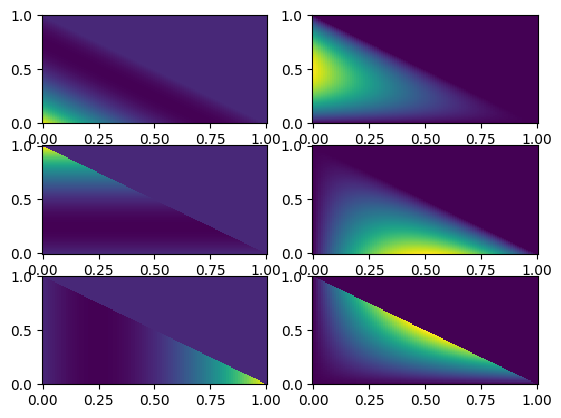

In [9]:
import matplotlib.pyplot as plt

n = 101
pts = np.linspace(0, 1, n)
vals = np.zeros((n,n))

mu = np.linalg.inv(V)

nshape = len(psi)

fig, axs = plt.subplots(3, 2)

for k in range(nshape):
    for j in range(n):
        for i in range(n):
            if pts[i] + pts[j] > 1:
                vals[i,j] = 0.0
            else:
                vals[i,j] = polyval(mu[:,k], pts[i], pts[j])
    X,Y = np.meshgrid(pts, pts)
    idx = np.unravel_index(k, axs.shape)
    axs[idx].pcolor(X, Y, vals)